After reading the file in chunks, it iterates through each chunk. Within each iteration, it calculates the mean (average) of the 'Disbursement Amount' column grouped by the columns 'State FSA Name', 'County FSA Name', 'Payment Year', and 'Accounting Program Description' using the groupby() and mean() functions. The result is a series of mean values for each group. These mean values are then appended to a list named means.

This code seems to be calculating the mean disbursement amount for each combination of state, county, payment year, and program description across all chunks of the CSV file. The resulting list means will contain these mean values.

In [2]:
import pandas as pd

chonker = pd.read_csv(r'D:/OneDrive - University of Illinois - Urbana/JupNote/CRP_data.csv', chunksize=100000, low_memory=False)
means=[]
for i in chonker:
    #i['Payment Year'] = i['Payment Date'].dt.year
    mean = i.groupby(['State FSA Name', 'County FSA Name', 'Payment Year', 'Accounting Program Description'])['Disbursement Amount'].mean()
    means.append(mean)


This code snippet concatenates the list of mean values (means) into a single DataFrame using pd.concat() along the axis 0 (rows). It then resets the index of the concatenated DataFrame to ensure that the index is continuous. After resetting the index, it filters out rows where the 'Accounting Program Year' column is not equal to 0.0 (assuming that 0.0 represents an invalid or missing value for this column). Finally, it displays the first five rows of the resulting DataFrame using the head() method.

In [3]:
final_means_df = pd.concat(means, axis=0).reset_index()
#final_means_df = final_means_df[final_means_df['Payment Year'] != 0.0]

final_means_df.head(5)

,State FSA Name,County FSA Name,Payment Year,Accounting Program Description,Disbursement Amount
0,Alabama,Autauga,2008.0,CRP - SIGNING INCENTIVE,7297.000000
1,Alabama,Autauga,2020.0,CRP PAYMENT - ANNUAL RENTAL,4046.800000
2,Alabama,Baldwin,2008.0,CRP - EMERGENCY FORESTRY ANNUAL RENTAL,10057.328000
3,Alabama,Baldwin,2020.0,CRP - TREE THINNING INCENTIVE PROGRAM,1699.750000
4,Alabama,Baldwin,2020.0,CRP PAYMENT - ANNUAL RENTAL,1796.648148


Next, we group the payments based on the 'Accounting Program Year' and 'Accounting Program Description' columns. It calculates the mean of the 'Disbursement Amount' for each group and then uses the unstack() method to pivot the grouped data, resulting in a DataFrame where the index consists of the unique values of 'Accounting Program Year', the columns consist of unique values of 'Accounting Program Description', and the values represent the mean disbursement amounts.

In [4]:
#pivot_df = final_means_df.groupby(['Accounting Program Year', 'Accounting Program Description'])['Disbursement Amount'].mean().unstack()
pivot_df = final_means_df.groupby(['Payment Year', 'Accounting Program Description'])['Disbursement Amount'].mean().unstack()

#pivot_df.head()

This code creates three new columns that aggregates the annual, incetive-base, and other payment.  

In [5]:
import pandas as pd

exclude_columns = [
    'CRP PAYMENT - ANNUAL', 
    'CRP PAYMENT - ANNUAL PAYMENT',
    'CRP ANNUAL RENTAL', 
    'CRP PAYMENT - ANNUAL RENTAL'
]

non_incentive_nor_excluded_columns = [
    col for col in pivot_df.columns 
    if 'incentive' not in col.lower() and col not in exclude_columns
]
pivot_df['Other Payments'] = pivot_df[non_incentive_nor_excluded_columns].sum(axis=1).fillna(0)


incentive_columns = [col for col in pivot_df.columns if 'incentive' in col.lower()]
pivot_df['Incentives'] = pivot_df[incentive_columns].sum(axis=1)


#pivot_df['Annual Payment'] = pivot_df['CRP PAYMENT - ANNUAL'] + pivot_df['CRP PAYMENT - ANNUAL PAYMENT'] + pivot_df['CRP ANNUAL RENTAL'] + pivot_df['CRP PAYMENT - ANNUAL RENTAL'] + pivot_df['CRP PAYMENT - ANNUAL']

pivot_df['Annual Payment'] = (pivot_df['CRP PAYMENT - ANNUAL'].fillna(0) +
    pivot_df['CRP PAYMENT - ANNUAL PAYMENT'].fillna(0) +
    pivot_df['CRP ANNUAL RENTAL'].fillna(0) +
    pivot_df['CRP PAYMENT - ANNUAL RENTAL'].fillna(0))

pivot_df.head()

Accounting Program Description,CRP - CHESAPEAKE BAY INCENTIVE,CRP - CONTINUOUS PIP,CRP - EMERGENCY FORESTRY ANNUAL RENTAL,CRP - EMERGENCY FORESTRY COST SHARE,CRP - PRACTICE INCENTIVE,CRP - RIPARIAN BUFFER INCENTIVE,CRP - SIGNING INCENTIVE,CRP - TREE THINNING INCENTIVE PROGRAM,CRP ANNUAL RENTAL,CRP BIOMASS CROP ASSISTANCE PROGRAM,...,CRP INCENTIVES,CRP PAYMENT - ANNUAL,CRP PAYMENT - ANNUAL PAYMENT,CRP PAYMENT - ANNUAL RENTAL,CRP PRACTICE INCENTIVES PAYMENT,CRP TRANSITION INCENTIVES PRGM,CRP WETLAND RESTORATION PROGRAM,Other Payments,Incentives,Annual Payment
Payment Year,,,,,,,,,,,,,,,,,,,,,
2008.0,NaN,NaN,2656.100231,3948.953153,2376.092398,8406.824695,1077.578431,NaN,473.435606,NaN,...,NaN,NaN,416.630210,NaN,NaN,NaN,3016.198968,9621.252352,11860.495525,890.065816
2009.0,NaN,NaN,2793.186571,3685.484049,3173.939200,7062.772675,1774.197018,NaN,605.906250,NaN,...,NaN,NaN,1732.076472,NaN,NaN,NaN,2897.855844,9376.526464,12010.908893,2337.982722
2010.0,NaN,NaN,3423.041943,3053.691883,2833.800628,9038.166407,1268.072629,NaN,NaN,NaN,...,2153.661349,NaN,1688.638050,NaN,NaN,NaN,3075.951748,9552.685574,15293.701013,1688.638050
2011.0,NaN,NaN,2793.190887,4242.734306,NaN,NaN,NaN,NaN,NaN,15090.597472,...,NaN,1868.027778,NaN,1605.623691,NaN,NaN,NaN,22126.522665,0.000000,3473.651469
2012.0,NaN,NaN,2901.326985,1613.663547,NaN,NaN,NaN,NaN,NaN,35131.600000,...,NaN,NaN,NaN,1443.029372,NaN,NaN,NaN,39646.590532,0.000000,1443.029372


This code plots the three major CRP payments. These payments are categorized into Annual, Incentive-based, and other payments. The annual payment dropped sharply after 2013. The incentive-based payments was halted during the 2011-2014 and experienced a decreasing trend during 2015-2018. Other payments peaked twice. Once in 2012, whcih is because of significant increase in "BIOMASS CROP ASSISTANCE PROGRAM" and the second time in 2019 which is driven by increase in "emerency forestry cost share payments".

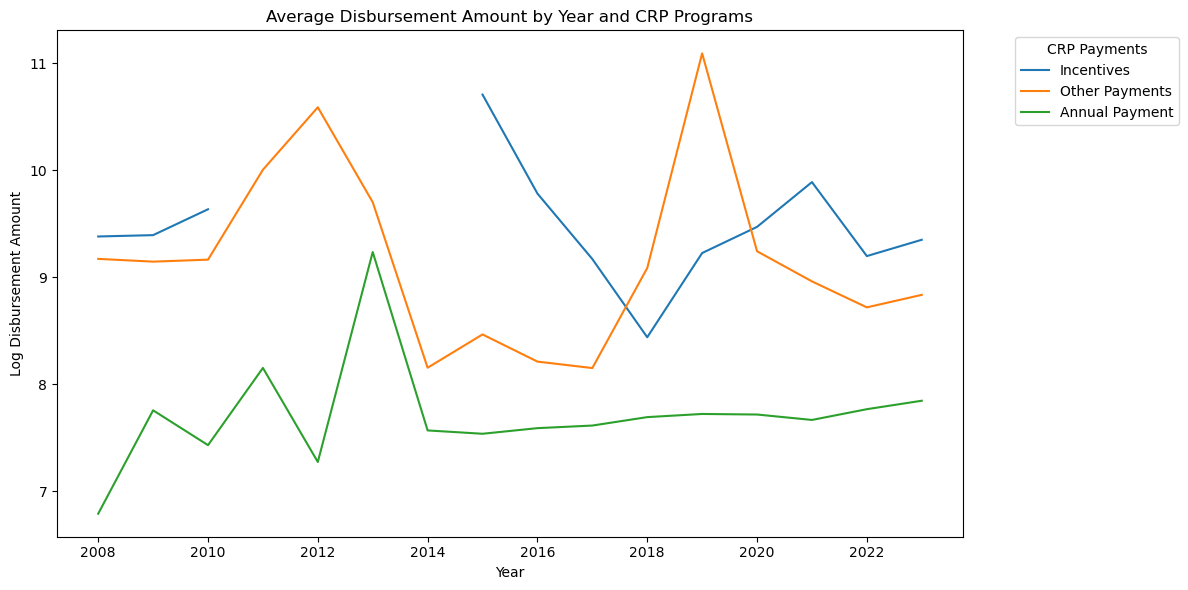

In [22]:
import matplotlib.pyplot as plt
import numpy as np

log_df = pivot_df[['Incentives', 'Other Payments', 'Annual Payment']].apply(np.log)

log_df.plot(kind='line', figsize=(12, 6))
plt.title('Average Disbursement Amount by Year and CRP Programs')
plt.xlabel('Year')
plt.ylabel('Log Disbursement Amount')
#plt.ylim(0, 30000) 
plt.legend(title='CRP Payments', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
#plt.show()
plt.savefig('fig01.jpeg')

#fig.write_image("plotly_graph.jpeg", width=800, height=400)

This code generates two additional data frames to store the payments for different sub-categories of incentive-base and other payments. Then, it plots payments for these sub-categoires.

In [9]:
OtherPayment_df = pivot_df[non_incentive_nor_excluded_columns].copy()
Incentive_df = pivot_df[incentive_columns].copy()
#OtherPayment_df.head()
#Incentive_df.head()

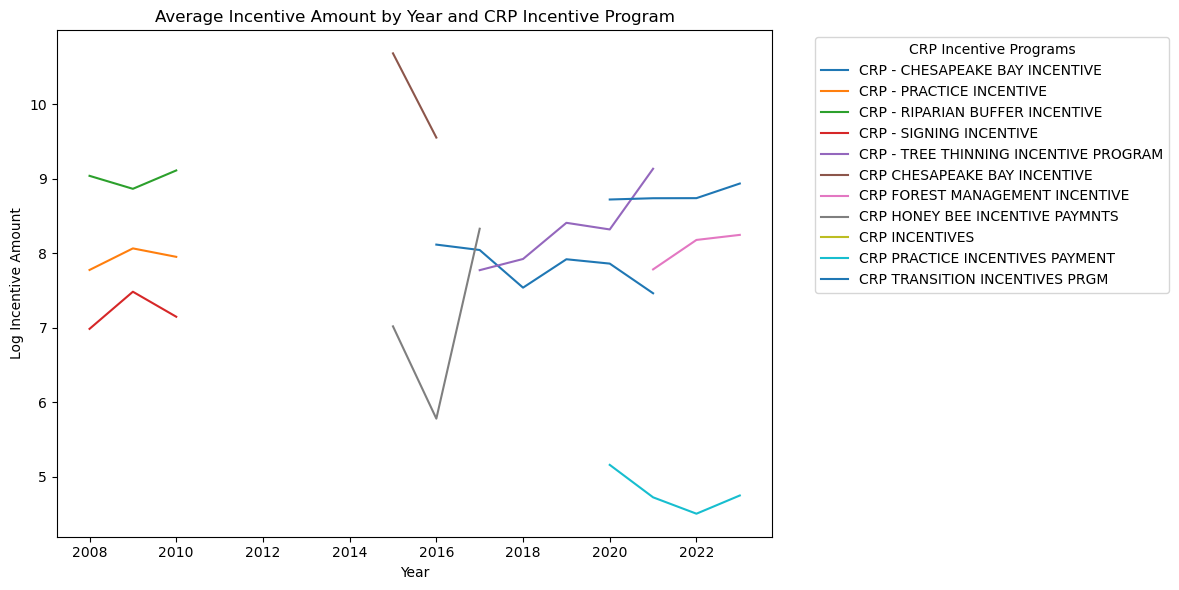

In [23]:
import matplotlib.pyplot as plt
import numpy as np

log_Incentive_df = Incentive_df.apply(np.log)
log_Incentive_df.plot(kind='line', figsize=(12, 6))

plt.title('Average Incentive Amount by Year and CRP Incentive Program')
plt.xlabel('Year')
plt.ylabel('Log Incentive Amount')
#plt.ylim(0, 30000) 
plt.legend(title='CRP Incentive Programs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
#plt.show()
plt.savefig('fig02.jpeg')


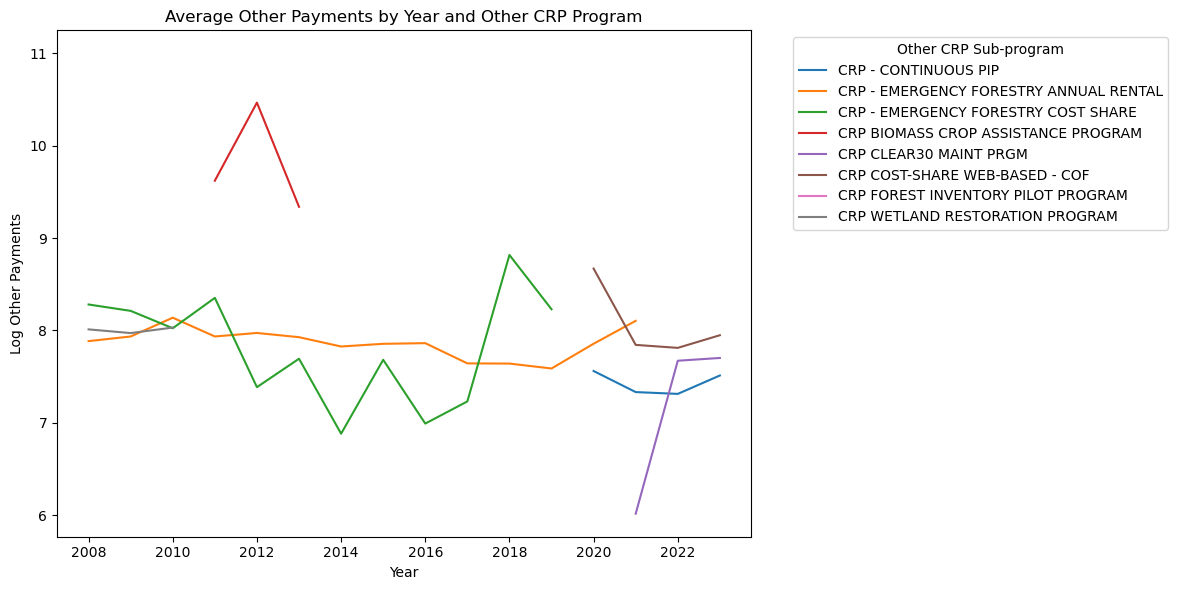

In [24]:
import matplotlib.pyplot as plt
import numpy as np

log_OtherPayment_df = OtherPayment_df.apply(np.log)

log_OtherPayment_df.plot(kind='line', figsize=(12, 6))

plt.title('Average Other Payments by Year and Other CRP Program')
plt.xlabel('Year')
plt.ylabel('Log Other Payments')
#plt.ylim(0, 30000) 
plt.legend(title='Other CRP Sub-program', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
#plt.show()
plt.savefig('fig03.jpeg')


### Now let's try to make some maps.

First, the dataset is aggregated at county level. 

In [36]:
county_grouped = final_means_df.groupby(['State FSA Name','County FSA Name', 'Accounting Program Description'])['Disbursement Amount'].mean().unstack()
county_grouped['Total'] = county_grouped.sum(axis=1)
county_grouped['Total'] = county_grouped['Total'].fillna(0)

county_grouped['Total']

State FSA Name  County FSA Name
Alabama         Autauga            12252.304047
                Baldwin            11282.930503
                Barbour             5873.658253
                Bibb                1755.744246
                Blount              2882.041552
                                       ...     
Wyoming         Sheridan           22312.137626
                Sublette            3277.916667
                Uinta                598.000000
                Washakie           11254.346813
                Weston             12469.117226
Name: Total, Length: 2779, dtype: float64

Next, shape file of US counties is called in. 

In [30]:
import geopandas as gpd

counties_shapefile_path = r'D:/OneDrive - University of Illinois - Urbana/UIUC/Courses/2023-24/JaredClass/ACE_592_SAE/ACE_592_SAE/Homework_2/us_counties_2017.shp'
counties_gdf = gpd.read_file(counties_shapefile_path)
counties_gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,01,005,00161528,0500000US01005,01005,Barbour,06,2292144656,50538698,"POLYGON ((-85.74803 31.61918, -85.74544 31.618..."
1,01,023,00161537,0500000US01023,01023,Choctaw,06,2365869837,19144469,"POLYGON ((-88.47323 31.89386, -88.46888 31.930..."
2,01,035,00161543,0500000US01035,01035,Conecuh,06,2201948618,6643480,"POLYGON ((-87.42720 31.26436, -87.42551 31.268..."
3,01,051,00161551,0500000US01051,01051,Elmore,06,1601762124,99965171,"POLYGON ((-86.41333 32.75059, -86.37115 32.750..."
4,01,065,00161558,0500000US01065,01065,Hale,06,1667907107,32423356,"POLYGON ((-87.87046 32.76244, -87.86818 32.765..."


Here we generate a dictionary to convert the FIPS codes to state names. 

In [31]:
state_fips_to_names = {
    '01': 'Alabama', '02': 'Alaska', '04': 'Arizona', '05': 'Arkansas', '06': 'California',
    '08': 'Colorado', '09': 'Connecticut', '10': 'Delaware', '11': 'District of Columbia', 
    '12': 'Florida', '13': 'Georgia', '15': 'Hawaii', '16': 'Idaho', '17': 'Illinois', 
    '18': 'Indiana', '19': 'Iowa', '20': 'Kansas', '21': 'Kentucky', '22': 'Louisiana', 
    '23': 'Maine', '24': 'Maryland', '25': 'Massachusetts', '26': 'Michigan', '27': 'Minnesota', 
    '28': 'Mississippi', '29': 'Missouri', '30': 'Montana', '31': 'Nebraska', '32': 'Nevada', 
    '33': 'New Hampshire', '34': 'New Jersey', '35': 'New Mexico', '36': 'New York', 
    '37': 'North Carolina', '38': 'North Dakota', '39': 'Ohio', '40': 'Oklahoma', '41': 'Oregon', 
    '42': 'Pennsylvania', '44': 'Rhode Island', '45': 'South Carolina', '46': 'South Dakota', 
    '47': 'Tennessee', '48': 'Texas', '49': 'Utah', '50': 'Vermont', '51': 'Virginia', 
    '53': 'Washington', '54': 'West Virginia', '55': 'Wisconsin', '56': 'Wyoming'
}

In [32]:
counties_gdf['STATE_NAME'] = counties_gdf['STATEFP'].replace(state_fips_to_names)
counties_gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,STATE_NAME
0,01,005,00161528,0500000US01005,01005,Barbour,06,2292144656,50538698,"POLYGON ((-85.74803 31.61918, -85.74544 31.618...",Alabama
1,01,023,00161537,0500000US01023,01023,Choctaw,06,2365869837,19144469,"POLYGON ((-88.47323 31.89386, -88.46888 31.930...",Alabama
2,01,035,00161543,0500000US01035,01035,Conecuh,06,2201948618,6643480,"POLYGON ((-87.42720 31.26436, -87.42551 31.268...",Alabama
3,01,051,00161551,0500000US01051,01051,Elmore,06,1601762124,99965171,"POLYGON ((-86.41333 32.75059, -86.37115 32.750...",Alabama
4,01,065,00161558,0500000US01065,01065,Hale,06,1667907107,32423356,"POLYGON ((-87.87046 32.76244, -87.86818 32.765...",Alabama


In [33]:
counties_gdf['STATE_NAME'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'District of Columbia', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', '60', '69', '72', '78',
       'Delaware', 'Nevada', 'New Hampshire', 'Rhode Island', 'Vermont',
       '66'], dtype=object)

This code only keeps the counties in the US mainland and plots the county level map.

<Axes: >

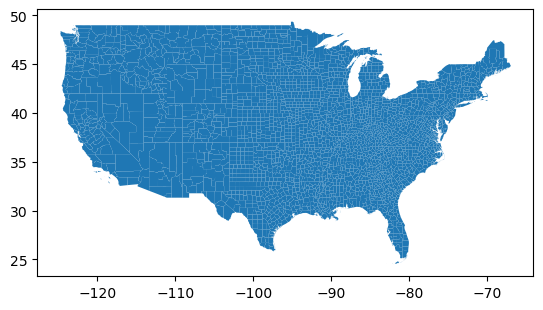

In [34]:
counties_gdf = counties_gdf[~counties_gdf['STATE_NAME'].isin(["Alaska","Hawaii","Puerto Rico",'60','66', '69', '72', '78'])]
counties_gdf['random'] = np.random.rand(len(counties_gdf))

counties_gdf.plot()

This code merges the county level shape file with the total CRP payment at county level.  

In [37]:
merged_gdf = counties_gdf.merge(county_grouped, left_on=['STATE_NAME', 'NAME'], right_on=['State FSA Name', 'County FSA Name'], how='left')
merged_gdf['Total'] = merged_gdf['Total'].fillna(0)
merged_gdf['Total_log'] = np.log1p(merged_gdf['Total'])  # Using np.log1p to avoid log(0)


This code maps the logarithm of CRP payments at county level. Darker color represents the counties that received the higher CRP payment over the last 20 years. 

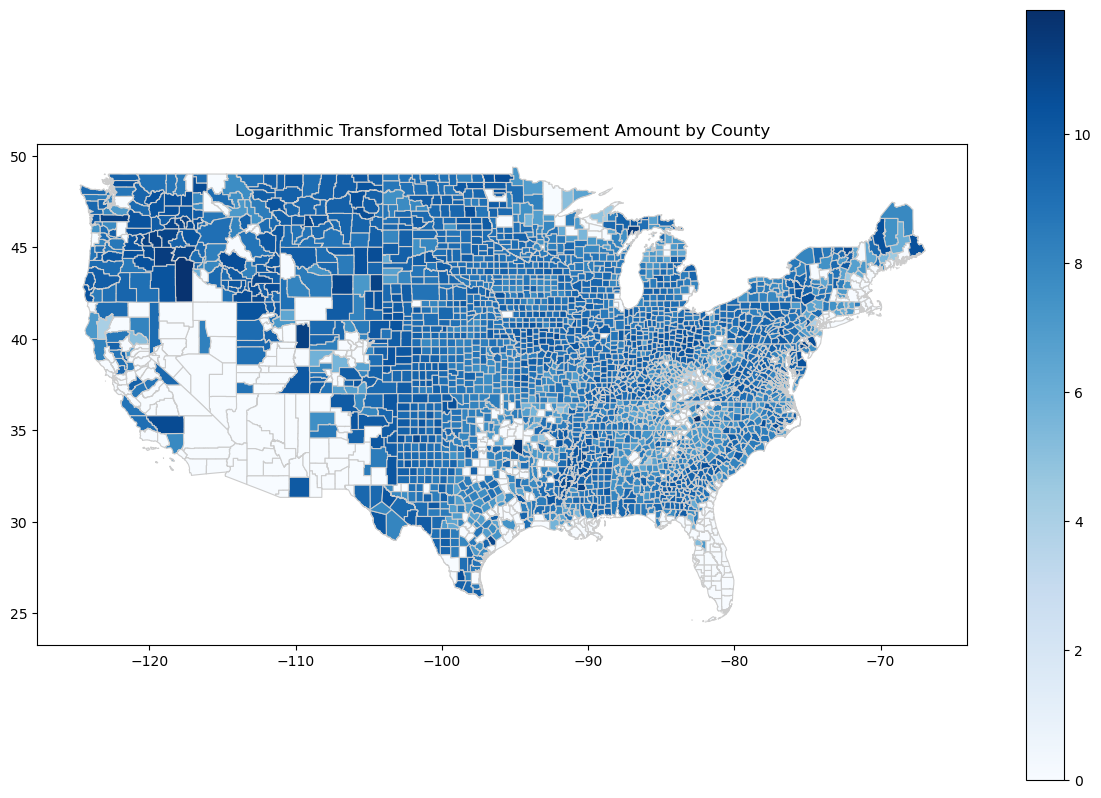

In [39]:
fig, ax = plt.subplots(figsize=(15, 10))
merged_gdf.plot(column='Total_log', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Logarithmic Transformed Total Disbursement Amount by County')
#plt.show()
plt.savefig('fig04.jpeg')


This map shows the county-level distribution of average CRP payments in the US. We calculated the conty-level average CRP payment, then summed the payments for all programs during 2008-2023. THe darker color exhibits higher amount of CRP payment paid to the recpients of those county. 

## State level map

In [45]:
state_grouped = final_means_df.groupby(['State FSA Name','Accounting Program Description'])['Disbursement Amount'].mean().unstack()
state_grouped['Total'] = state_grouped.sum(axis=1)
state_grouped['Total'] = state_grouped['Total'].fillna(0)

state_grouped['Total']

State FSA Name
Alabama                  26709.510572
Alaska                   83025.088599
Arizona                  21655.250000
Arkansas                 20304.399787
California               10295.359928
Colorado                 40267.999799
Connecticut               1150.080571
Delaware                 34290.491239
District of Columbia     88692.807500
Florida                  19895.726261
Georgia                  18681.683055
Hawaii                    2918.344075
Idaho                    60102.227281
Illinois                 21779.642717
Indiana                  23629.198918
Iowa                     23393.019102
Kansas                   26490.924756
Kentucky                 22645.829612
Louisiana                33358.021837
Maine                    27467.231879
Maryland                 23984.330105
Massachusetts             1162.055556
Michigan                 53170.062812
Minnesota                25168.464828
Mississippi              75038.104874
Missouri                 30044.1495

In [42]:
import geopandas as gpd

states_shapefile_path = r'D:/OneDrive - University of Illinois - Urbana/UIUC/Courses/2023-24/JaredClass/ACE_592_SAE/ACE_592_SAE/Class_Examples/2_Images/us_states.json'
states_gdf = gpd.read_file(states_shapefile_path)
states_gdf.head()

#states_gdf['NAME'].unique()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


<Axes: >

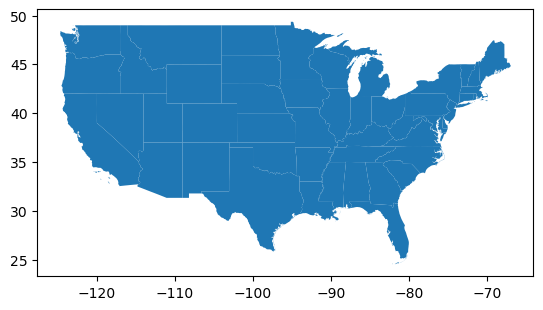

In [43]:
states_gdf = states_gdf[~states_gdf['NAME'].isin(["Alaska","Hawaii","Puerto Rico"])]
#states_gdf['random'] = np.random.rand(len(states_gdf))
# Plot the new dataframe
states_gdf.plot()

Washington state seems to have received the highest amount CRP payments over the last two decades. Mississipi, Oregon, and Michigan received significant payments after Washington state. 

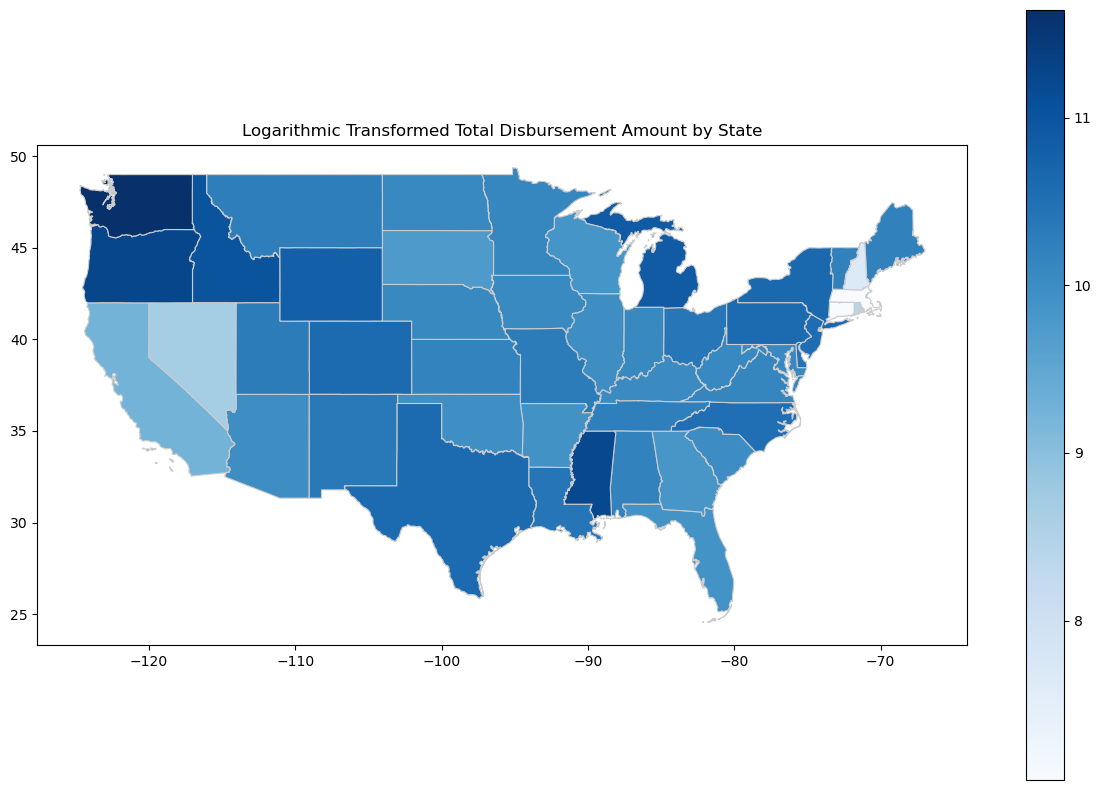

In [46]:
st_merged_gdf = states_gdf.merge(state_grouped, left_on=['NAME'], right_on=['State FSA Name'], how='left')
st_merged_gdf['Total'] = st_merged_gdf['Total'].fillna(0)
st_merged_gdf['Total_log'] = np.log1p(st_merged_gdf['Total']) 

fig, ax = plt.subplots(figsize=(15, 10))
st_merged_gdf.plot(column='Total_log', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Logarithmic Transformed Total Disbursement Amount by State')
#plt.show()
plt.savefig('fig05.jpeg')
